<a href="https://colab.research.google.com/github/ItzhakGeller/MyFirstGitHubRepo/blob/main/linear_regression_with_deepl_learning_boston_housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()
print(train_data.shape,test_data.shape)
train_data[1]

57026/57026 [==============================] - 0s 0us/step
(404, 13) (102, 13)


array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [3]:
#SINCE THE DATA IS DIFFERENT IN RANGE IT IS PREFERED TO NORMALIZE IT PRIOR TO LEARNING
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data /= std

test_data-=mean
test_data/=std

train_data[1]

array([-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
        1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
       -1.71818909,  0.43190599, -1.32920239])

In [5]:
from tensorflow import keras
from keras import layers

def build_model():    
    model = keras.Sequential([
        layers.Dense(64,activation="relu"),
        layers.Dense(64,activation="relu"),
        layers.Dense(1)
        ])
    model.compile(optimizer="rmsprop",
                metrics=["mae"],
                loss = "mse")
    return model
      

In [6]:
#since we have little data, we can't rely on random spliting the data to validation and test, since the results may be depended in the random selection f the data points, therefore we
#will split the data in 4 different ways and take the average validation score

In [7]:
k = 4
num_of_samples = train_data.shape[0] // k
epochs=200
score = []

for i in range(k):
    val_data = train_data[i*num_of_samples:(i+1)*num_of_samples]
    val_targets = train_targets[i*num_of_samples:(i+1)*num_of_samples]
    temp_train_data = np.concatenate((train_data[:num_of_samples*i],train_data[(i+1)*num_of_samples:]),axis=0)
    temp_train_targets = np.concatenate((train_targets[:num_of_samples*i],train_targets[(i+1)*num_of_samples:]),axis=0)
    model = build_model()
    model.fit(temp_train_data,
              temp_train_targets,
              epochs=epochs,
              batch_size=16,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data,val_targets)
    print(val_mse,val_mae)
    score.append(val_mae)
    

4/4 [==============================] - 0s 6ms/step - loss: 7.5590 - mae: 2.0200
7.559030532836914 2.020019292831421
4/4 [==============================] - 0s 4ms/step - loss: 14.4383 - mae: 2.8377
14.438315391540527 2.837655544281006
4/4 [==============================] - 0s 5ms/step - loss: 13.8728 - mae: 2.5240
13.872838020324707 2.5239903926849365
4/4 [==============================] - 0s 4ms/step - loss: 11.9272 - mae: 2.3900
11.927212715148926 2.390002489089966


In [8]:
np.mean(score)

2.4429169297218323

In [9]:
#so the error is 10%, let's see if we can reduce it by adding more epochs, we will also monitor the validation error by using the history 

k = 4
num_of_samples = train_data.shape[0] // k
epochs=500
all_mae_histories = []

for i in range(k):
    val_data = train_data[i*num_of_samples:(i+1)*num_of_samples]
    val_targets = train_targets[i*num_of_samples:(i+1)*num_of_samples]
    temp_train_data = np.concatenate((train_data[:num_of_samples*i],train_data[(i+1)*num_of_samples:]),axis=0)
    temp_train_targets = np.concatenate((train_targets[:num_of_samples*i],train_targets[(i+1)*num_of_samples:]),axis=0)
    model = build_model()
    history = model.fit(temp_train_data,
              temp_train_targets,
              epochs=epochs,
              batch_size=16,
              verbose=0,
              validation_data = (val_data,val_targets)
                       )
    print(i)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)
    

0
1
2
3


In [10]:
all_histories_avg = np.zeros(epochs)
for i in (all_mae_histories):
    all_histories_avg+=i
    
all_histories_avg/=len(all_mae_histories)
    

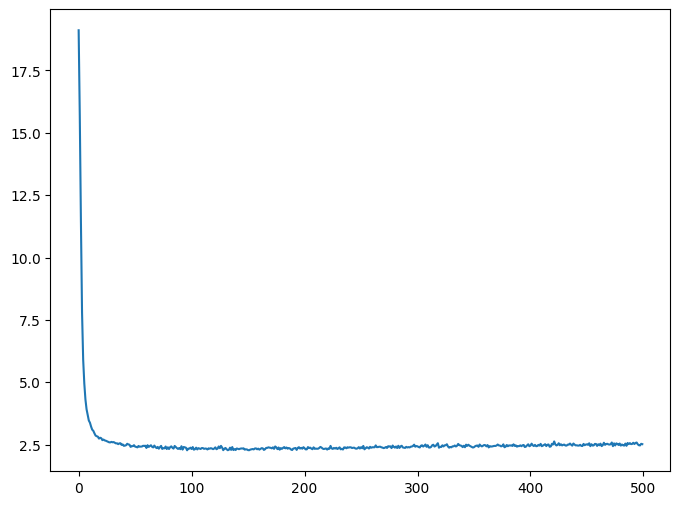

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(all_histories_avg)
plt.show()

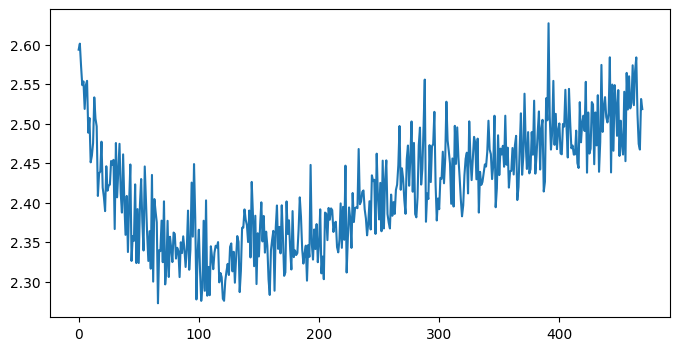

In [15]:
#to better see the graph I will truncate the first epochs
all_histories_avg_trunced = all_histories_avg[30:]
plt.figure(figsize = (8,4))
plt.plot(all_histories_avg_trunced)
plt.show()


In [16]:
# so it looks like the best results is at 100 epochs, let;s train the final model


In [17]:
model = build_model()
model.fit(train_data,train_targets,
          epochs=100,
          batch_size=16,
          verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 3ms/step - loss: 489.3749 - mae: 20.0652
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 308.2211 - mae: 15.1669
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 140.2316 - mae: 9.4806
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 65.3628 - mae: 5.8711
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 40.6413 - mae: 4.4649
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 30.7116 - mae: 3.8239
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 25.2862 - mae: 3.5713
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 22.2303 - mae: 3.2629
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 19.9422 - mae: 3.0930
Epoch 10/100
26/26 [==============================] - 0s 5ms/step - loss: 18.0060 - mae: 2.9458
Epoch 11/100
26/26 [========================

In [18]:
test_mae,test_mse = model.evaluate(test_data,test_targets)
print(test_mae,test_mse)

4/4 [==============================] - 0s 4ms/step - loss: 15.4431 - mae: 2.4581
15.443086624145508 2.458087682723999
